In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('historical_data.csv',encoding='unicode_escape')

In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.shape

(435742, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [6]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [8]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [9]:
# all column name present in dataset
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

stn_code(station code), sampling_date(date of sample collection,state(india state),location(location of sample),agency type(type of area),so2(sulphur dioxide concentration) no2(nitrogen dioxide concentration),rspm(respriable suspended particulate matter concentration) spm (suspended particulate matter) loction_monitoring_station pm2_5 (particulate matter 2_5) date(date) 

# Data visulaization

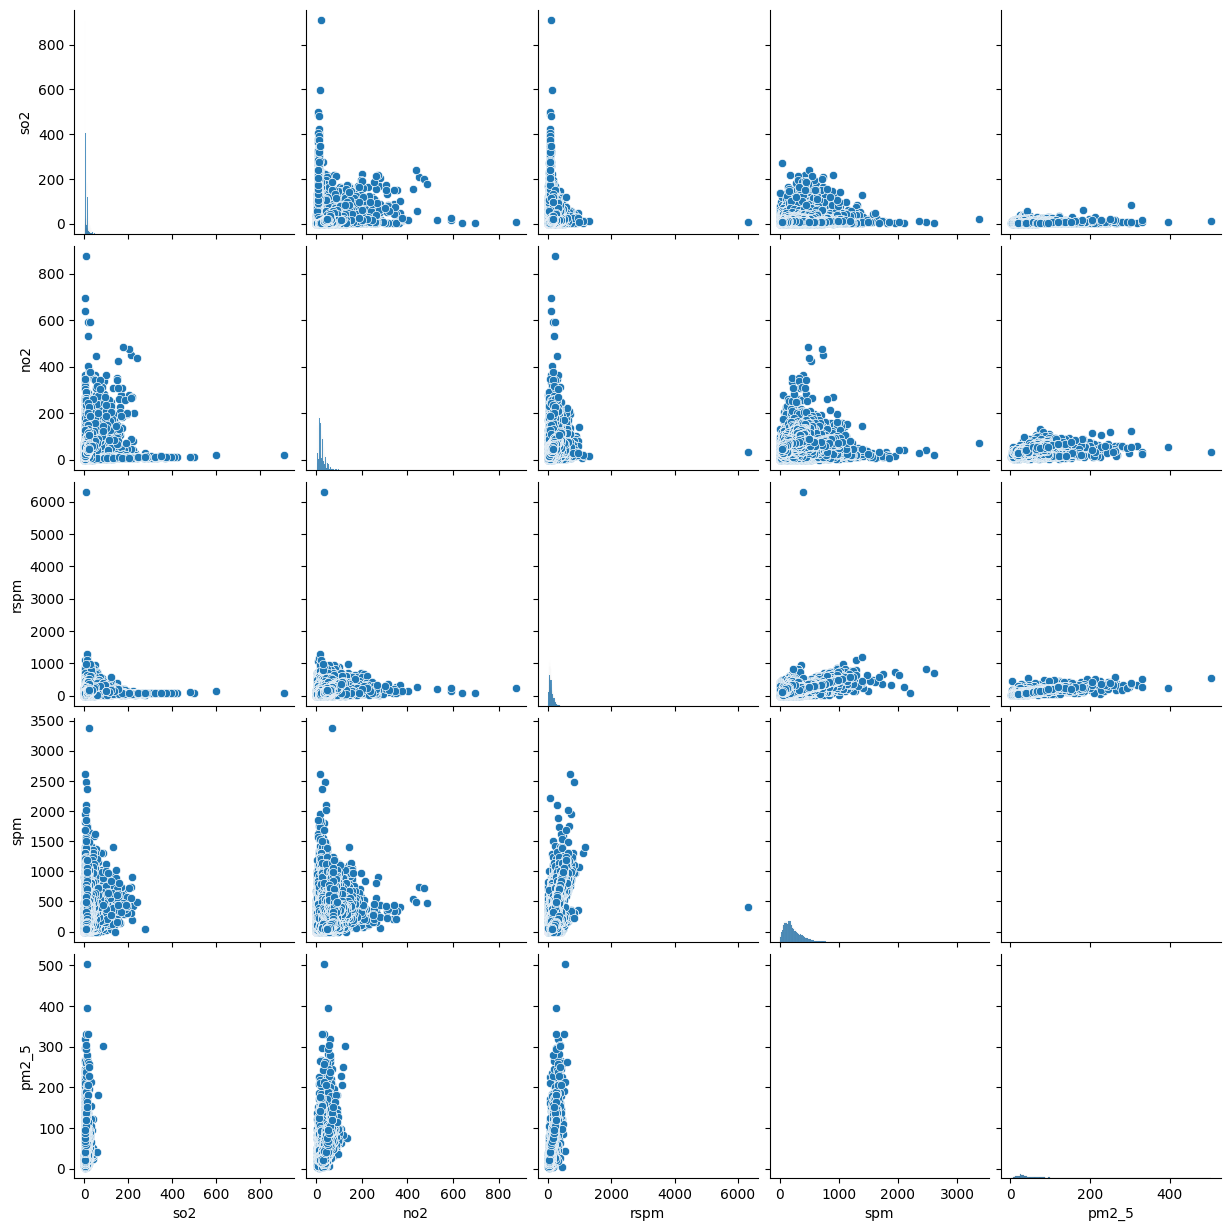

In [10]:
sns.pairplot(df)

In [11]:
df['state'].value_counts()

state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     

[]

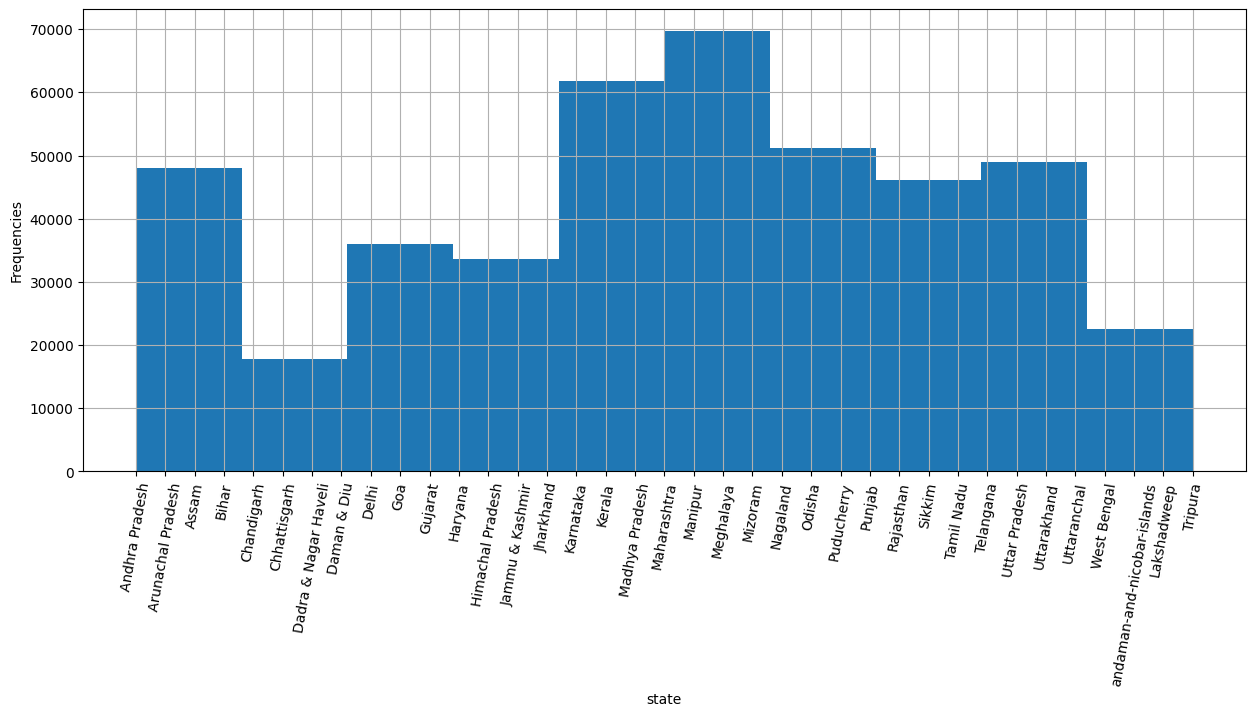

In [12]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=80)
df.state.hist()
plt.xlabel("state")
plt.ylabel("Frequencies")
plt.plot()

In [13]:
df['type'].value_counts()

type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64

[]

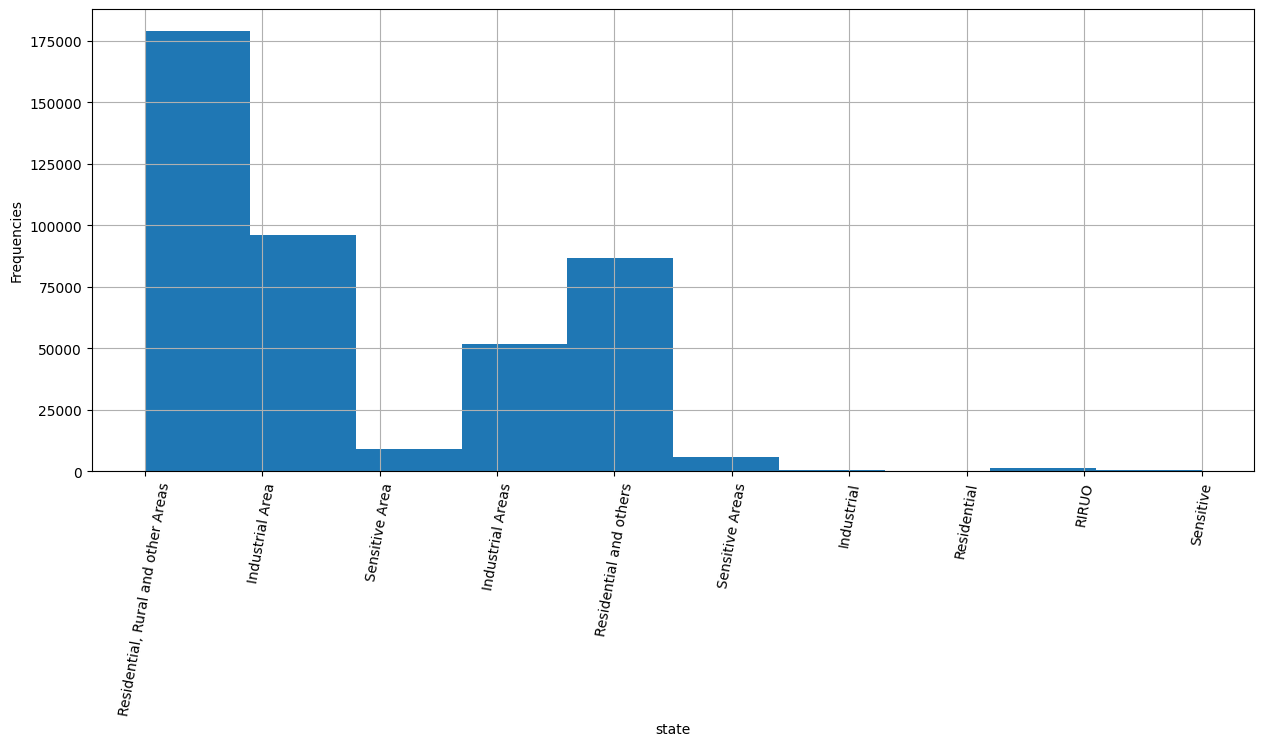

In [14]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=80)
df.type.hist()
plt.xlabel("state")
plt.ylabel("Frequencies")
plt.plot()

In [15]:
df['agency'].value_counts()

agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: count, Length: 64, dtype: int64

[]

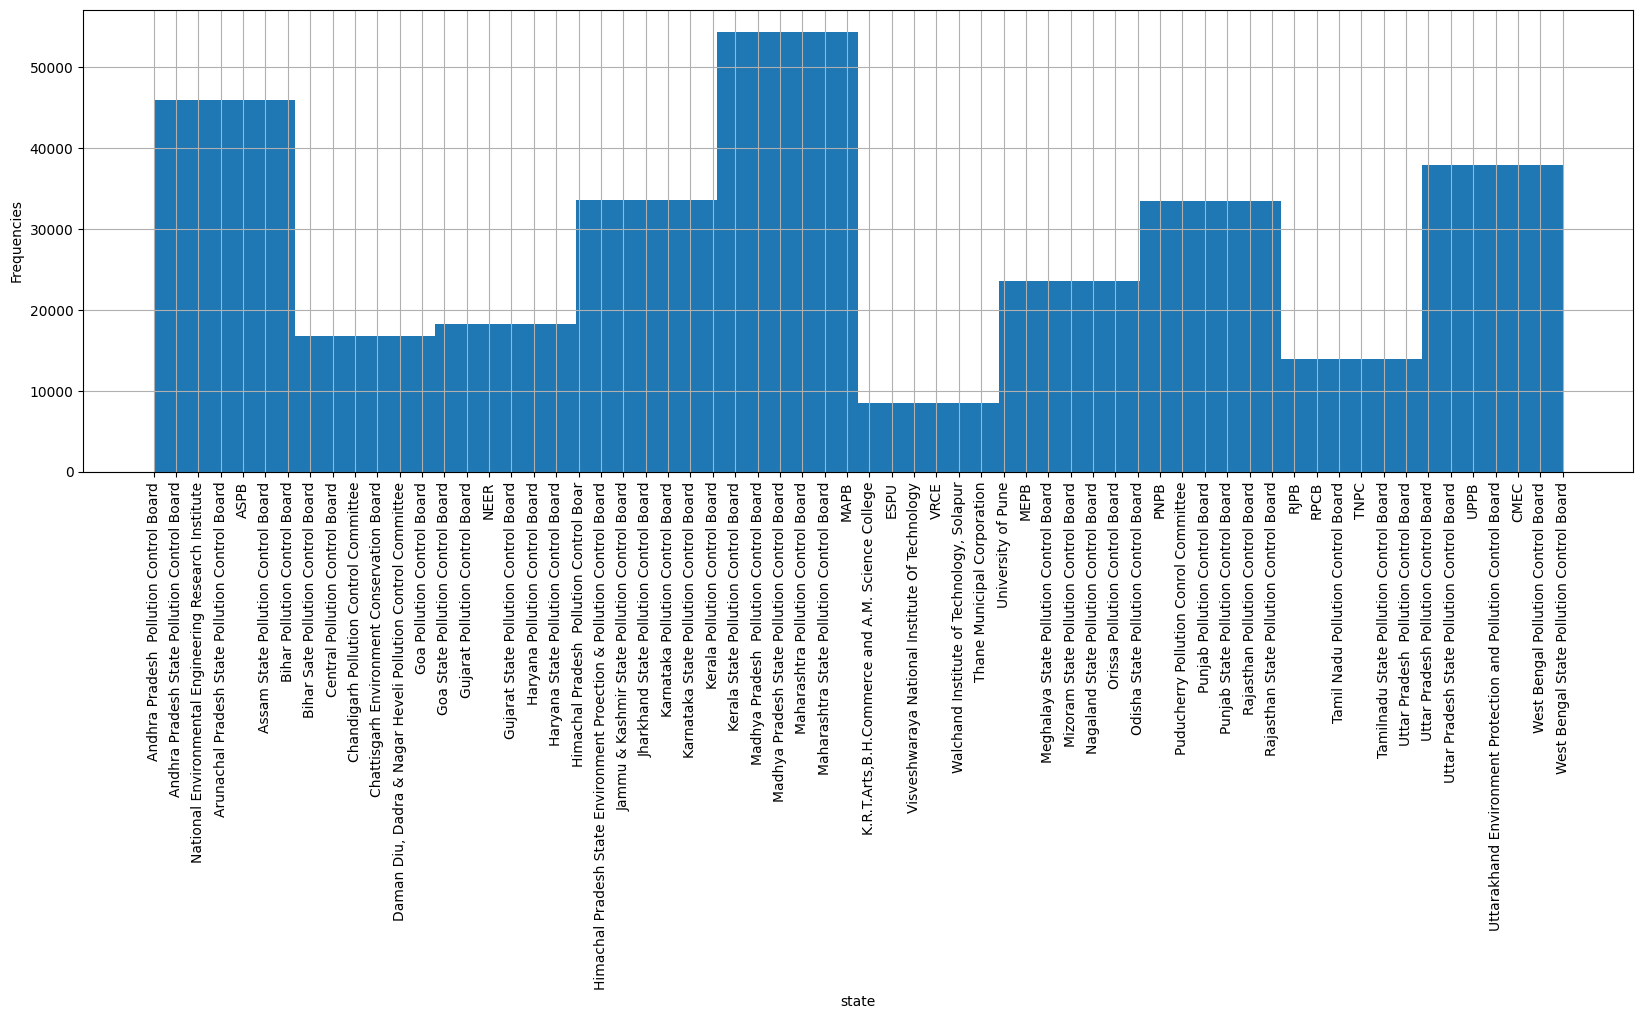

In [16]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel("state")
plt.ylabel("Frequencies")
plt.plot()

In [17]:
df['so2'].head(20)

0      4.8
1      3.1
2      6.2
3      6.3
4      4.7
5      6.4
6      5.4
7      4.7
8      4.2
9      4.0
10     3.6
11     3.9
12     5.6
13     3.3
14     3.9
15     3.5
16     7.9
17     4.0
18    12.4
19     4.0
Name: so2, dtype: float64

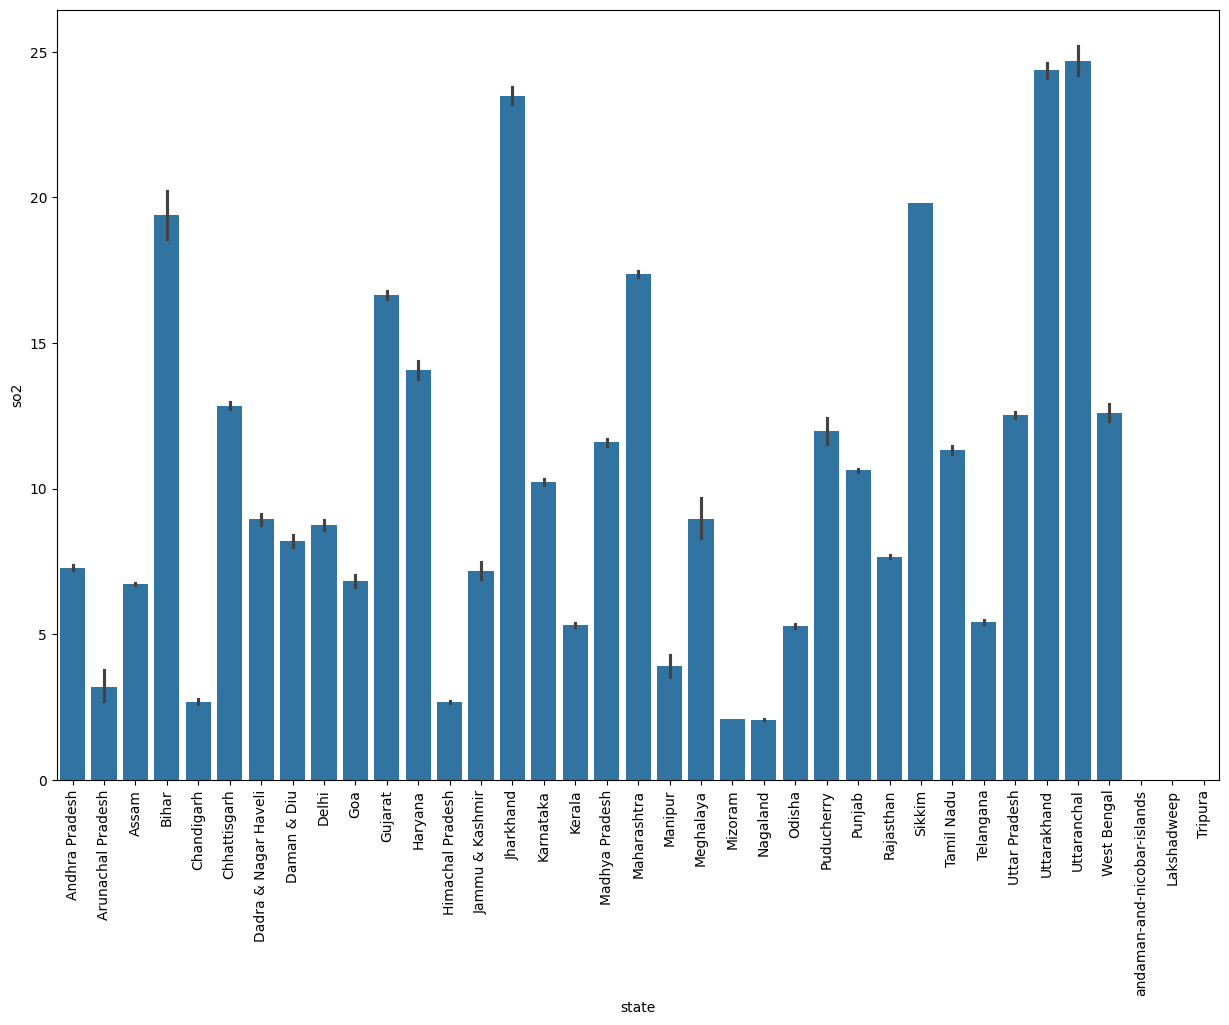

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x='state', y='so2', data=df)
plt.xticks(rotation=90)
plt.show()


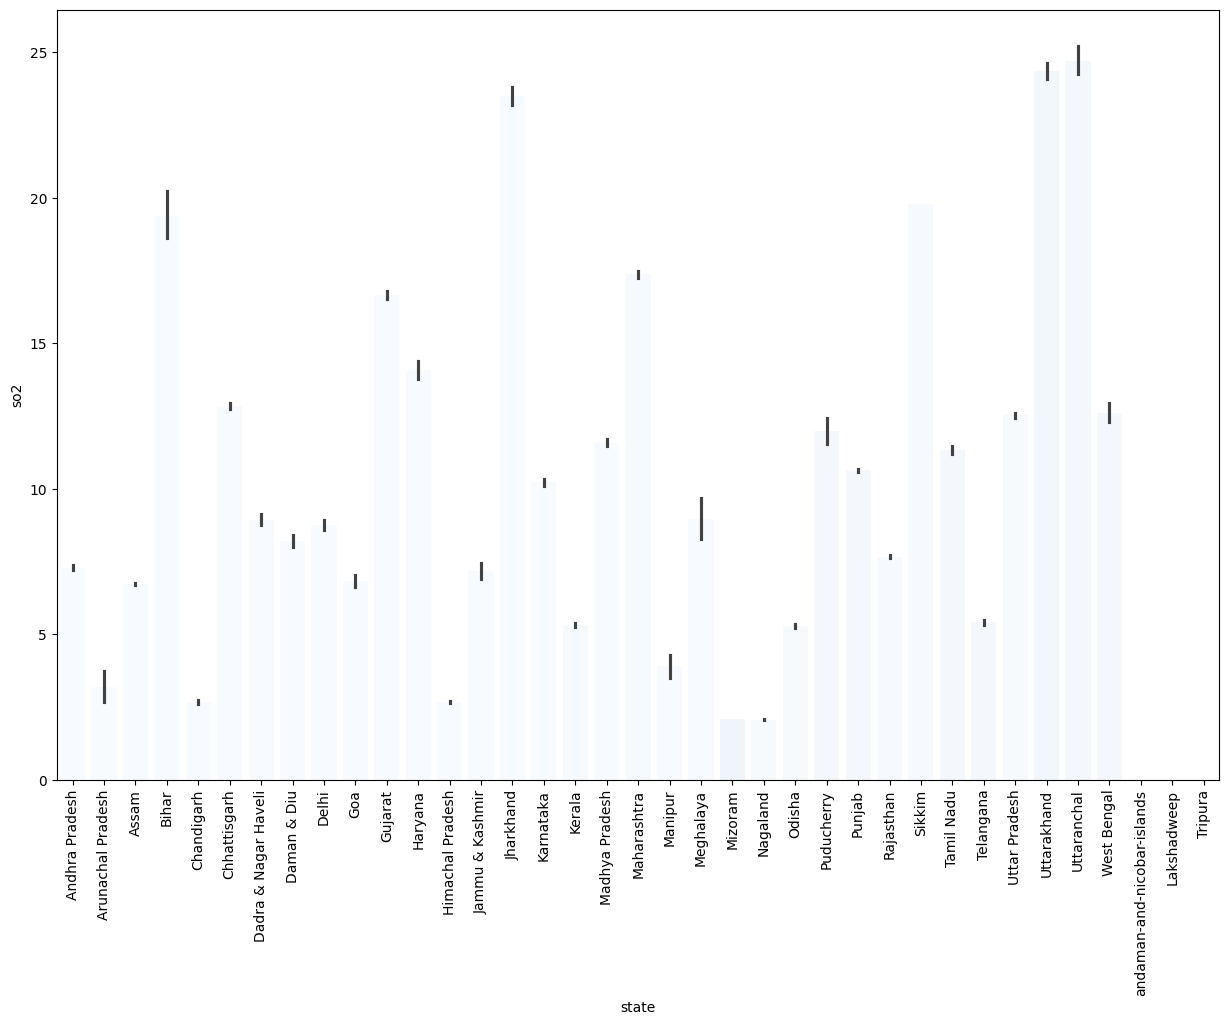

In [19]:
# Create a colormap
cmap = sns.color_palette("Blues", as_cmap=True)
# cmap_reversed = cmap.reversed()

# Normalize the SO2 values
norm = plt.Normalize(df['so2'].min(), df['so2'].max())

# Map the SO2 values to colors
colors = [cmap(norm(value)) for value in df['so2']]

# Create the plot
plt.figure(figsize=(15, 10))
sns.barplot(x='state', y='so2', data=df, palette=colors)
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='state'>

<Figure size 3000x1000 with 0 Axes>

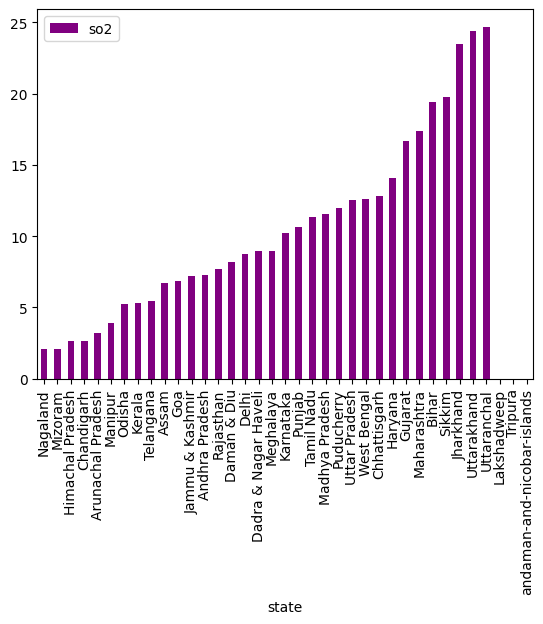

In [20]:
plt.figure(figsize=(30,10))
df[['so2','state']].groupby(['state']).mean().sort_values(by='so2').plot.bar(color='purple')

<Axes: xlabel='state', ylabel='rspm'>

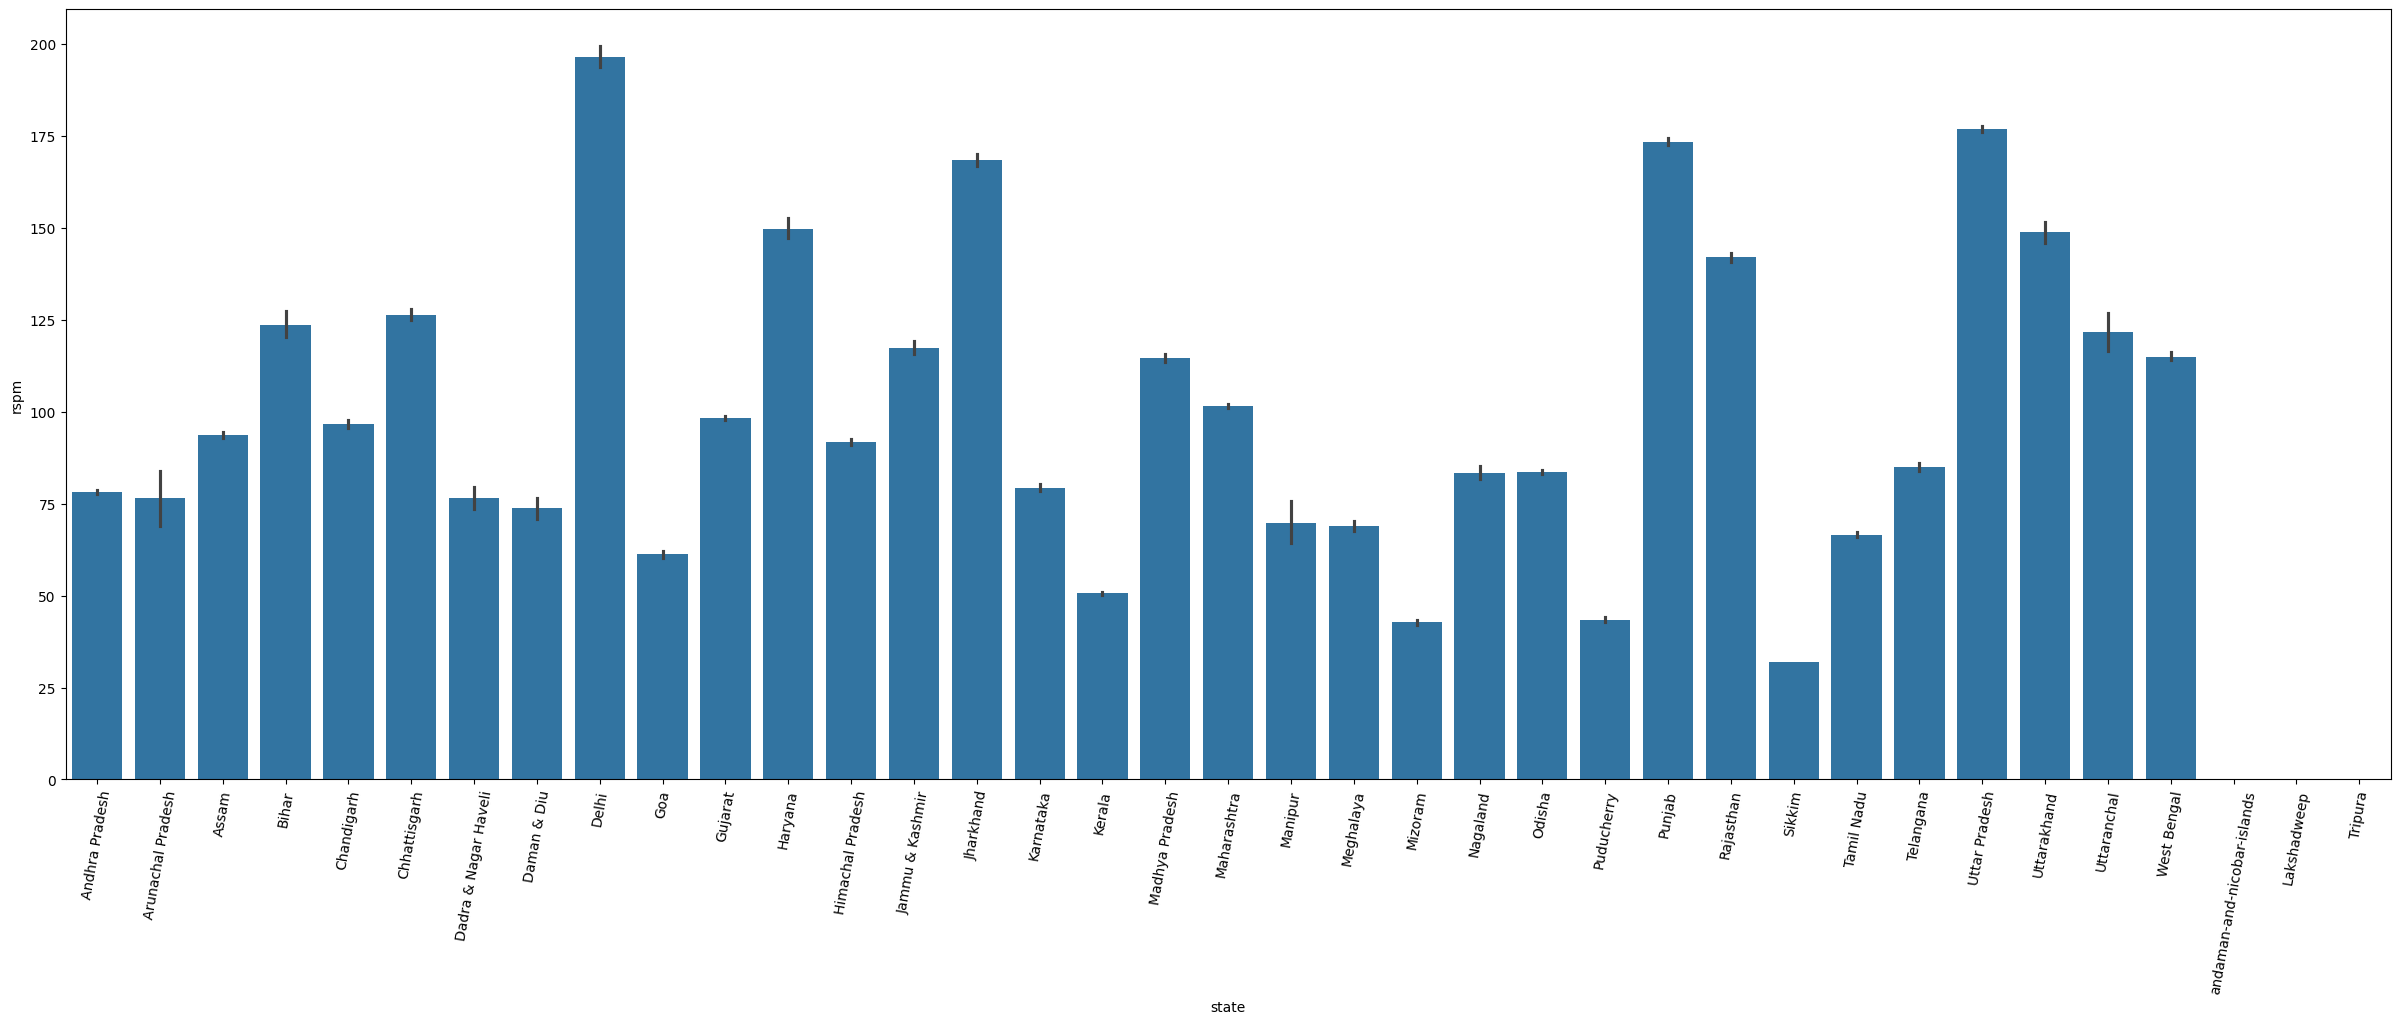

In [21]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=80)
sns.barplot(x='state',y='rspm',data=df)

<Axes: xlabel='state', ylabel='pm2_5'>

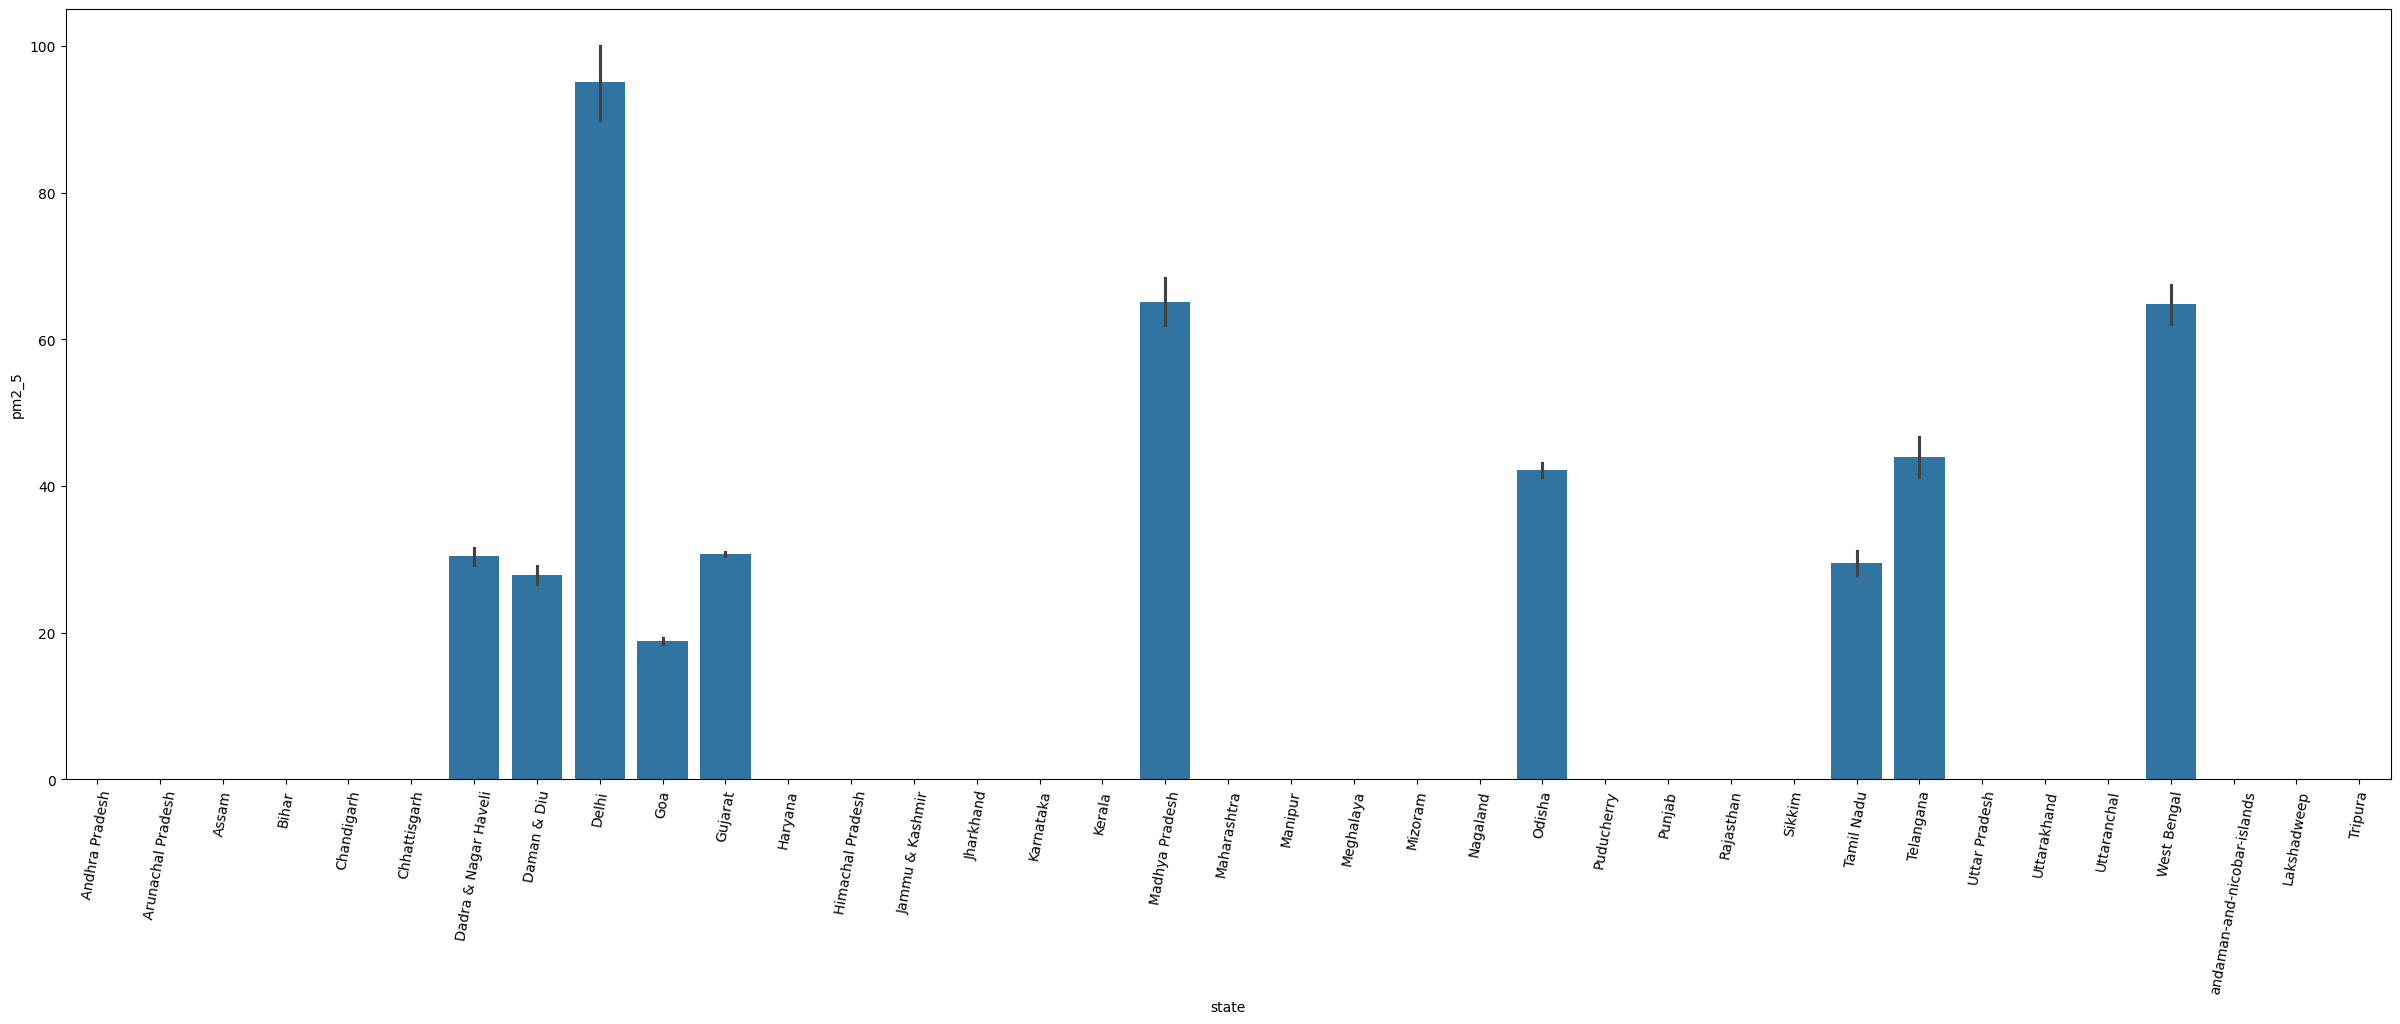

In [22]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=80)
sns.barplot(x='state',y='pm2_5',data=df)

In [23]:
nullvalues=df.isnull().sum().sort_values(ascending=False)

In [24]:
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [25]:
nullvalues_parcentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [26]:
nullvalues_parcentage

pm2_5                          97.862497
spm                            54.478797
agency                         34.304933
stn_code                       33.064749
rspm                            9.230692
so2                             7.951035
location_monitoring_station     6.309009
no2                             3.725370
type                            1.237659
date                            0.001606
sampling_date                   0.000688
location                        0.000688
state                           0.000000
dtype: float64

In [27]:
missing_value_with_parcent=pd.concat([nullvalues,nullvalues_parcentage],axis=1,keys=['total','parcent'])

In [28]:
missing_value_with_parcent

,total,parcent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [29]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)


In [30]:
df.isnull().sum()

sampling_date         3
state                 0
location              3
type               5393
so2               34646
no2               16233
rspm              40222
spm              237387
pm2_5            426428
date                  7
dtype: int64

In [46]:
df.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [47]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
# null value imputation for categorical data

In [48]:
df.fillna(0,inplace=True)
# null value replaced with zero for the numerical data

In [49]:
df.isnull().sum()

sampling_date    0
state            0
location         0
type             0
so2              0
no2              0
rspm             0
spm              0
pm2_5            0
date             0
dtype: int64

In [50]:
data=df

# calculate air quality index for so2 based on formula

the air quality index is piecewise linear function of the pollition concentration. 
the boundary between AQI cetegories. there is a discontinuous jump of one AQI unit.
To convert from concentration to AQI this eqation is used

## function to calculate SO2 individual pollutant index (si)

In [51]:
#Function to calculate so2 individual pollutant index(si)
def calculate_si(so2):
    si=0
    if (so2<=40):
        si= so2*(50/40)
    if (so2>40 and so2<=80):
        si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
        si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
        si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
        si= 300+(so2-800)*(100/800)
    if (so2>1600):
        si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


## function to calculate no2 individual pollutant index(ni) 

In [52]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
        ni= no2*50/40
    elif(no2>40 and no2<=80):
        ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
        ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        ni= 300+(no2-280)*(100/120)
    else:
        ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


## function to calculate rspm individual pollutant index(rpi)

In [53]:
#Function to calculate no2 individual pollutant index(rpi)
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
        rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
        rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
        rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
        rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
        rpi=300+(rpi-120)*(100/130)
    else:
        rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]
df.tail()
#many data values of rspm values is unawailable since it was not measure before

,rspm,rpi
435737,143.0,121.000000
435738,171.0,130.333333
435739,0.0,0.000000
435740,0.0,0.000000
435741,0.0,0.000000


## function to calculate spm individual pollutant index(spi)

In [54]:
#Function to calculate no2 individual pollutant index(spi)
def calculate_spi(spm):
    spi=0
    if(spm<=50):
        spi=spm
    if(spm<50 and spm<=100):
        spi=spm
    elif(spm>100 and spm<=250):
        spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
        spi=200+(spm-250)
    elif(spm>350 and spm<=450):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]
df.tail()
#many data values of rspm values is unawailable since it was not measure before

,spm,spi
435737,0.0,0.0
435738,0.0,0.0
435739,0.0,0.0
435740,0.0,0.0
435741,0.0,0.0


## function to calculate Air quality index(AQI) of every data value

In [55]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
        aqi=si
    if(spi>si and spi>ni and spi>rpi):
        aqi=spi
    if(ni>si and ni>spi and ni>rpi):
        aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
        aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['sampling_date','state','si','ni','rpi','spi','AQI']]
df.head()

,sampling_date,state,si,ni,rpi,spi,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,February - M021990,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,February - M021990,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,March - M031990,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,March - M031990,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [56]:
def AQI_range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "unhealthy"
    elif x>300 and x<=400:
        return "Very Unhealthy"
    elif x>400:
        return "Hazardous"
    
data['AQI_range']=data['AQI'].apply(AQI_range)
data.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,date,si,ni,rpi,spi,AQI,AQI_range
0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990-02-01,6.000,21.750,0.0,0.0,21.750,Good
1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,1990-02-01,3.875,8.750,0.0,0.0,8.750,Good
2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990-02-01,7.750,35.625,0.0,0.0,35.625,Good
3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990-03-01,7.875,18.375,0.0,0.0,18.375,Good
4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,1990-03-01,5.875,9.375,0.0,0.0,9.375,Good


In [58]:
data['AQI_range'].value_counts()

AQI_range
Poor              224285
Moderate           86450
Good               56947
unhealthy          33510
Hazardous          18701
Very Unhealthy     15849
Name: count, dtype: int64

# Split the data into dependent or independent columns

In [60]:
x=data[['si','ni','rpi','spi']]
y=data['AQI']
x.head()

,si,ni,rpi,spi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [61]:
y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(x_train.shape,x_test.shape)

(348593, 4) (87149, 4)


# Linear Regression

In [63]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [64]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [65]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

In [66]:
str(RMSE_train)

'31.88609595742222'

In [67]:
str(RMSE_test)

'31.91461215029437'

In [68]:
model.score(x_train,y_train)

0.9269785346755283

In [69]:
model.score(x_test,y_test)

0.9263397150760337

# Decission Tree regressor

In [145]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [146]:
train_pred=DT.predict(x_train)
test_pred=DT.predict(x_test)

In [147]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))


In [148]:
print('RMSE trainingData',str(RMSE_train))
print('RMSE testData',str(RMSE_test))

RMSE trainingData 1.151595791921671e-15
RMSE testData 0.43203217412629463


In [149]:
DT.score(x_train,y_train) # overfitting the model

1.0

In [150]:
DT.score(x_test,y_test)

0.9997477172238336

# Random Forest Regressor

In [151]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [152]:
train_pred=RF.predict(x_train)
test_pred=RF.predict(x_test)

In [153]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

In [154]:
print('RMSE trainingData',str(RMSE_train))
print('RMSE testData',str(RMSE_test))

RMSE trainingData 0.18504244918016824
RMSE testData 0.34853309266693866


In [155]:
RF.score(x_train,y_train)

0.999953936294844

In [156]:
RF.score(x_test,y_test)

0.9998358112259617

# Classification Algorithm

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [159]:
x2=df[['soi','noi','rpi','spi']]
y2=df['AQI_range']

In [160]:
x2.head()

,soi,noi,rpi,spi
0,6.000,27.18750,0.0,0.0
1,3.875,10.93750,0.0,0.0
2,7.750,44.53125,0.0,0.0
3,7.875,22.96875,0.0,0.0
4,5.875,11.71875,0.0,0.0


In [161]:
y2.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: AQI_range, dtype: object

In [163]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,random_state=70)

# Logistic Regressor

In [164]:
log_reg=LogisticRegression()
log_reg.fit(x_train2,y_train2)

LogisticRegression()

In [165]:
train2_pred=log_reg.predict(x_train2)
test2_pred=log_reg.predict(x_test2)

In [167]:
# accuracy on test
accuracy_score(y_train2,train2_pred)
accuracy_score(y_test2,test2_pred)

0.9642046742189315

In [168]:
metrics.cohen_kappa_score(y_test2,test2_pred)

0.9030802323136704

In [173]:
log_reg.predict([[727,207.55,70.2,100]])

array(['Poor'], dtype=object)

# Decision Tree classifier

In [174]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train2,y_train2)

DecisionTreeClassifier()

In [175]:
train2_pred=DTC.predict(x_train2)
test2_pred=DTC.predict(x_test2)

In [176]:
# accuracy on test
print(accuracy_score(y_train2,train2_pred))
print(accuracy_score(y_test2,test2_pred))

1.0
0.9999655761970877


In [177]:
metrics.cohen_kappa_score(y_test2,test2_pred)

0.9999115185481425

In [181]:
DTC.predict([[6.000,27.18750,0.0,0.0]])

array(['Good'], dtype=object)

In [184]:
DTC.predict([[6.000,287,1,2]])

array(['unhealthy'], dtype=object)

# Random forest classifier